# Project 2 : Visualization

## Instructions

### Description

In this project, you will look at three bad visualizations then:

1. Identify what makes them bad
1. Use the same data to make a better chart
1. Explain an interesting pattern you noticed.

Some helpful questions to determine if a visualization is bad:

1. What is the visualization trying to show? Ex. Comparison? Relationship? Change over time?
2. Is this the right visualization to use?
3. Does the visualization have the correct labels and axes limits?
4. Is there too much being shown in one visualization? Should it be split?

Some helpful questions to find patterns in a visualization:

1. How do different data points compare? Are there significant differences? Are there any outliers?
2. If comparing data/series, how do they rank? Is there a significant difference between rankings?
3. If looking at data over time, is there any seasonality? How do the values compare to the mean and/or median? How do the values change over time? Ex. Ups and downs? Always up? Always down?

### Getting Started

The lecture on data visualization (available in the usual places) has a lot of code examples.  Also don't forget the matplotlib documentation available from the Help menu in the notebook.

Also, this is the first assignment we've given where we ask you to provide text answers and not just code. You don't have to get fancy, but you'll want to use Markdown to write up your answers.  There is Markdown help available from the Help menu as well.

### Grading

For grading purposes, we will clear all outputs from all your cells and then run them all from the top.  Please test your notebook in the same fashion before turning it in.

### Submitting Your Solution

To submit your notebook, first clear all the cells (this won't matter too much this time, but for larger data sets in the future, it will make the file smaller).  Then use the File->Download As->Notebook to obtain the notebook file.  Finally, submit the notebook file on Canvas.

### Credits

Many thanks to Saad Elbeleidy for this assignment!

### Setup Code

In [1]:
## Imports
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Problem 1: Bad line chart (15 points)

To get you started, we'll walk through 1 bad visualization.

![Bad Line Chart](http://imgur.com/kB6uNZC.png)

In [2]:
# Bad line chart data & names
badLineNames = ["2016 Q1", "2016 Q2", "2016 Q3", "2016 Q4"]
badLineProduct1 = [240, 300, 280, 400]
badLineProduct2 = [300, 320, 150, 160]
badLineProduct3 = [120, 140, 180, 160]
badLineProduct4 = [380, 400, 450, 500]

**What makes this visualization bad?**

**1. What is the visualization trying to show? Ex. Comparison? Relationship? Change over time?**

This visualization trys to show data over time.

**2. Is this the right visualization to use?**

Yes, we should be using a line chart to show data over time.

**3. Does the visualization have the correct labels and axes limits?**

There are no labels or a title. We could also use some more space between the min and maximum data points and the axes limits.

**4. Is there too much being shown in one visualization? Should it be split?**

Yes, it's quite difficult to follow each series, it should be split.


Since the chart type is the correct one, it seems all we need to do is add labels and split the lines into panels. Before we do that, we can probably also improve the design. We covered how to improve a `matplotlib` plot in class using different styles. Select a `style` and apply it below.

In [3]:
## Apply your chosen style here
plt.style.use('fivethirtyeight')

example of how to set up subplots can be found in lecture 05, slide 13. 

Now we need to plot the data over different panels. We can use [`plt.subplots`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) to create multiple panels. Since we have 4 products, we're going to need 4 panels on top of each other. `subplots` returns two variables, the figure object and an array of axes. What we can do is loop through each Axes object and create a plot for that product. The first Axes object should plot the first product, the second should plot the second product and so on.
<br><br>
**Step 1: Buffers** 
<br>Each subplot will have its own y axis, but to make the scale is the same for all subplots, create a buffer between the lowest value among all products and the start of the y axis as well as between the highest value and the top of the y axis. These buffers are simply integers that extend the y axis above the highest value in the products, and below the lowest.
<br><br>
**Step 2: Mean**
<br>Calculate the mean of the entire data set -- the mean of the individual product means. To calculate this easily, first put the products in a list, create a list of the individual means using a comprehension over the product list, then find the mean of the list of individual means.
<br><br>
**Step 3: Colors**
<br>Choose a color for the plot of each product. This can be done by filling a list with each color's matplotlib name. Available colors can be found [here](https://matplotlib.org/2.0.2/api/colors_api.html)
<br><br>
**Step 4: Subplots** 
<br>Now that those numbers are calculated, create 4 line charts on top of each other, each plotting one of the products.
<br>For each subplot:
<br>
1) plot the product with `plot(data, color)`
<br>
2) Set the y scale using `set_ylim(bottomBuffer, topBuffer)`
<br>
3) Add an x label if this panel is not the bottom one using `set_xticklabels(list of labels)`
<br>
4) Add a title to the subplot with the product number using `set_title(title)`
<br>
5) Add a dashed line with the value of the mean using `plot(mean, args)` or `axhline(mean, args)`. More info [here](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axhline.html)
<br><br>
**Step 5: Beautify**
<br>
1) Add a title to the whole diagram(the superplot) with `fig.suptitle(title)`
<br>
2) Rearrange subplots, if necessary, with `fig.subplots_adjust(left, bottom, right, top, wspace, hspace)`
<br><br>
**Notes:**
<br>
- Many of the arguments to many of these functions are 'default', meaning they're optional. If there's an argument you don't need or want, try leaving it out. For example, if you only want to change the hspace of the subplots, you can call `fig.subplot_adjust(hspace=0.6)` without specifying the other arguments. Just be sure to label the argument you want to specify. Don't just write `fig.subplot_adjust(0.6)`

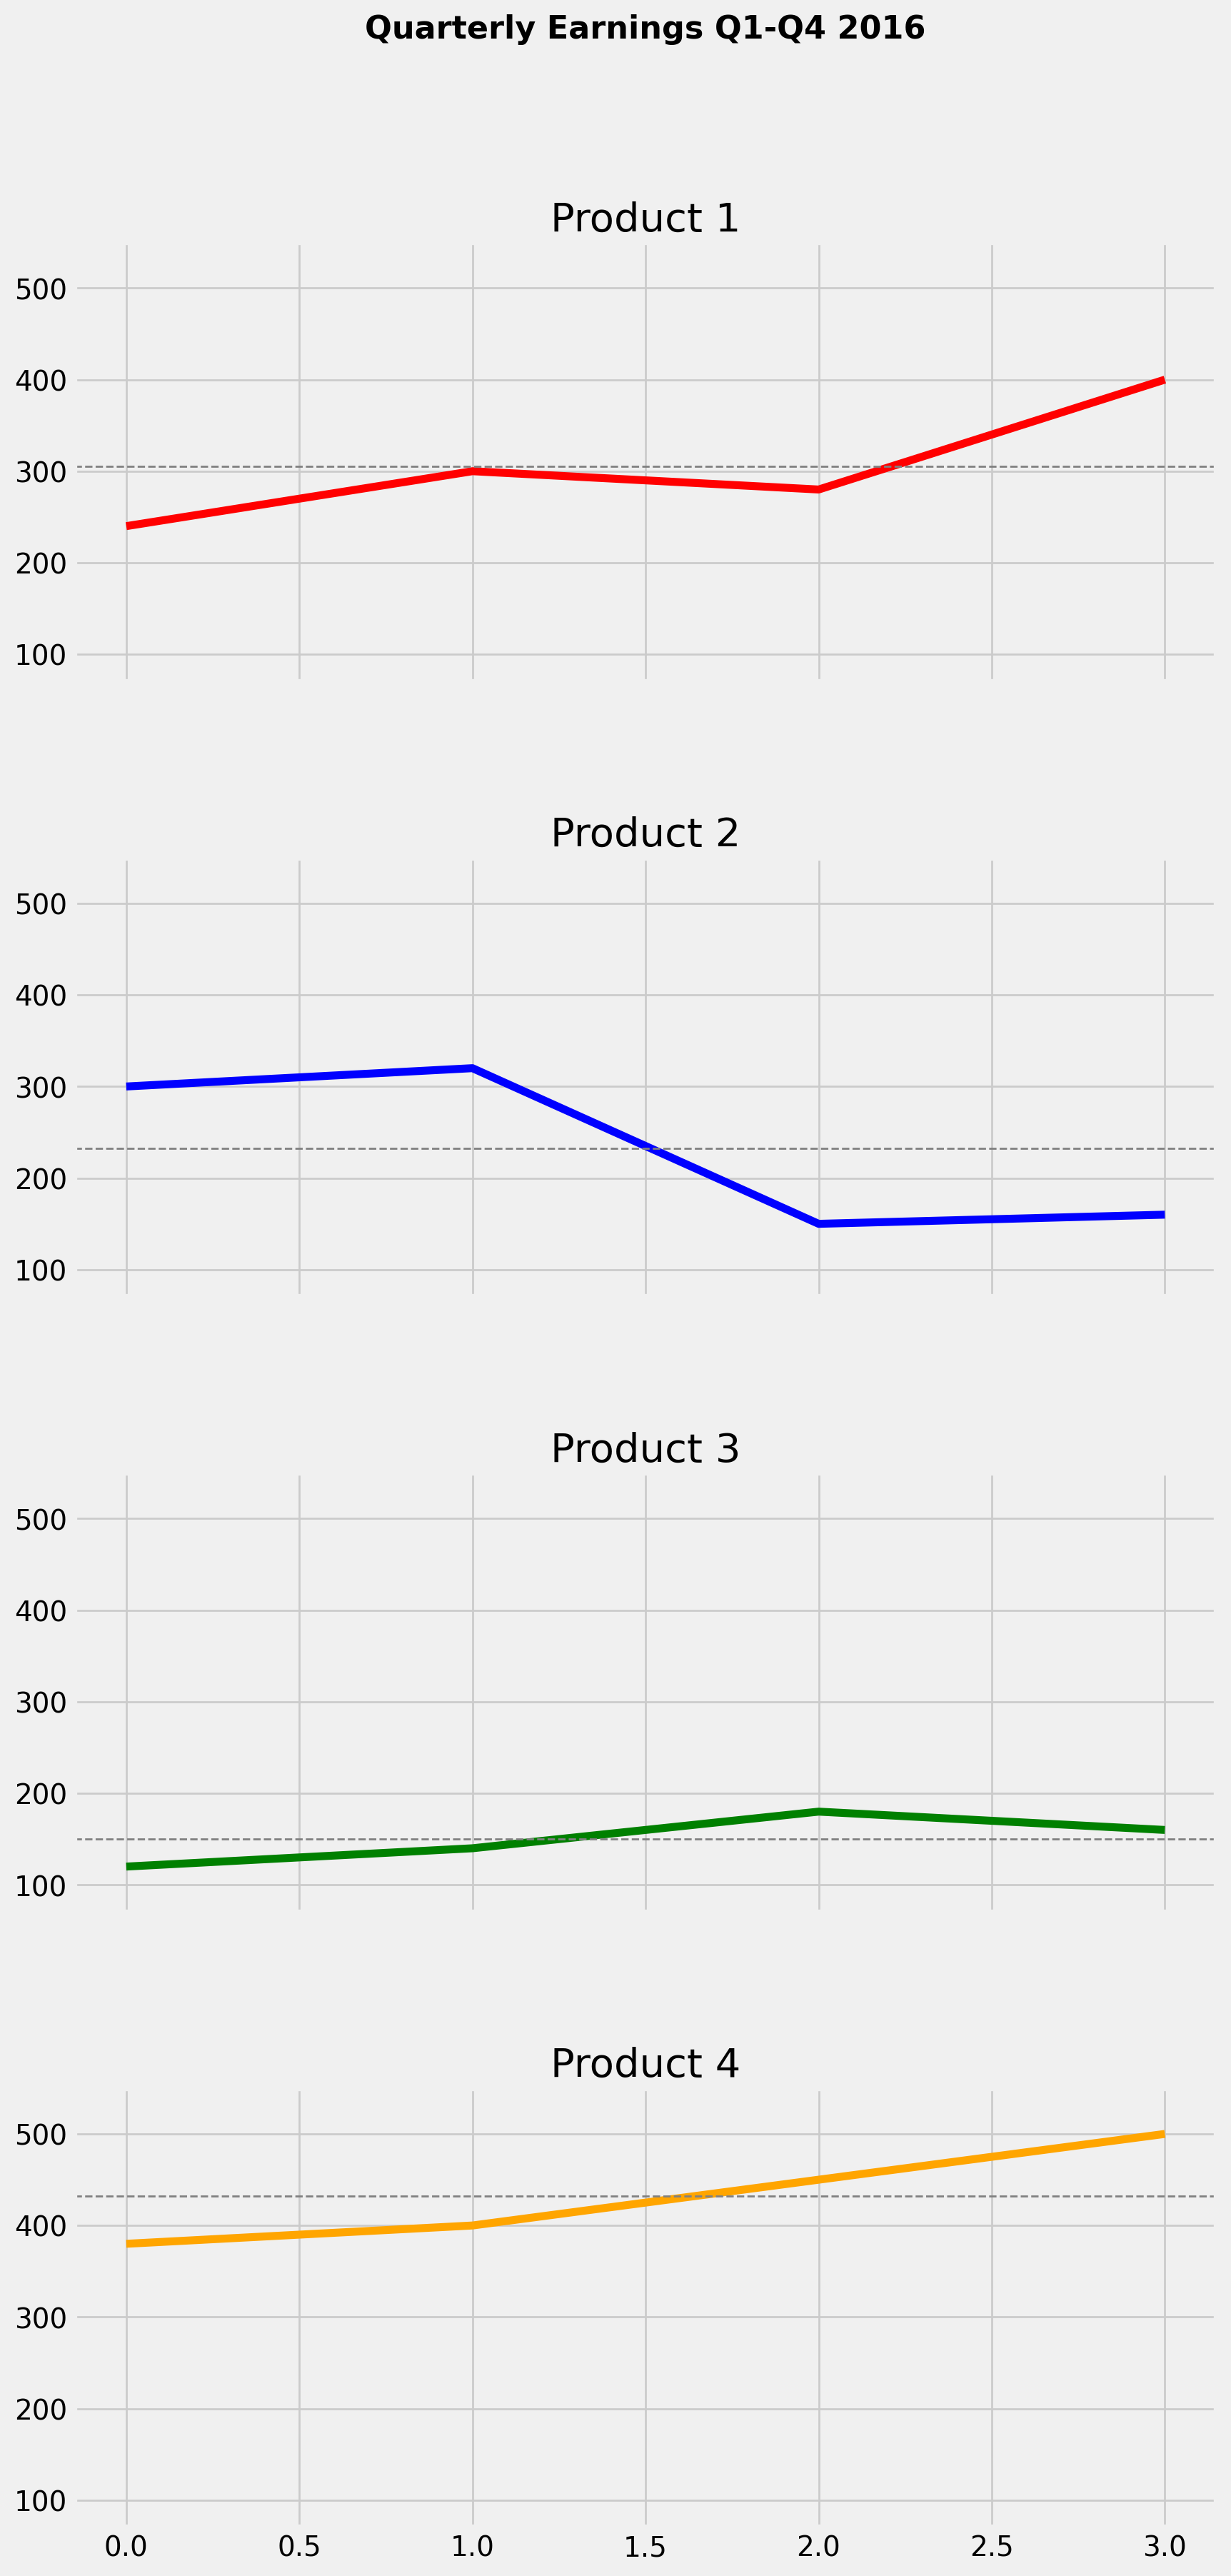

In [4]:
# Step 1
all_data = [badLineProduct1, badLineProduct2, badLineProduct3, badLineProduct4]
min_val = min([min(data) for data in all_data])
max_val = max([max(data) for data in all_data])

bottomBuffer = min_val - 50
topBuffer = max_val + 50

# Step 2
means = [np.mean(data) for data in all_data]
overall_mean = np.mean(means)

# Step 3
colors = ['red', 'blue', 'green', 'orange']

# Step 4
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20))

for i, ax in enumerate(axes):
    ax.plot(all_data[i], color=colors[i])
    ax.set_ylim(bottomBuffer, topBuffer)
    
    if i != len(axes) - 1:
        ax.set_xticklabels([])  # Remove x-tick labels for all but the bottom plot
    
    ax.set_title(f'Product {i+1}')
    ax.axhline(means[i], color='gray', linestyle='dashed', linewidth=1)
    
# Step 5
fig.suptitle('Quarterly Earnings Q1-Q4 2016', fontsize=16, fontweight='bold')
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

Now that you've created a better plot, try to describe a pattern in the dataset. Use the following questions as a reference:

1. How do different data points compare? Are there significant differences? Are there any outliers?
2. If comparing data/series, how do they rank? Is there a significant difference between rankings?
3. If looking at data over time, is there any seasonality? How do the values compare to the mean and/or median? How do the values change over time? Ex. Ups and downs? Always up? Always down?

**Your Answer Here:**

1. Products 1 and 4 increased over the course of the 4 quarters. Products 2 and 3 decreased over the year. No outliers are apparent, and it does appear that product 4 is significantly more profitable than products 1, 2 and 3, with 3 closing the gap.]
2.

Next, look through the following bad visualizations and apply the above workflow to:

1. Determine what makes them bad
1. Create a better visualization
1. Describe a pattern in the data

### Problem 2: Bad pie chart (20 points)

Explain why this visualization is a bad one:

![Bad Pie Chart](http://imgur.com/Wg9DOZd.png)

**Your Answer Here:**

>*Edit this cell with your answer*

In [5]:
badPieNames = ["Golden", "Boulder", "Denver", "Colo Springs"]
badPieValues = [0.37, 0.4, 0.5, 0.35]

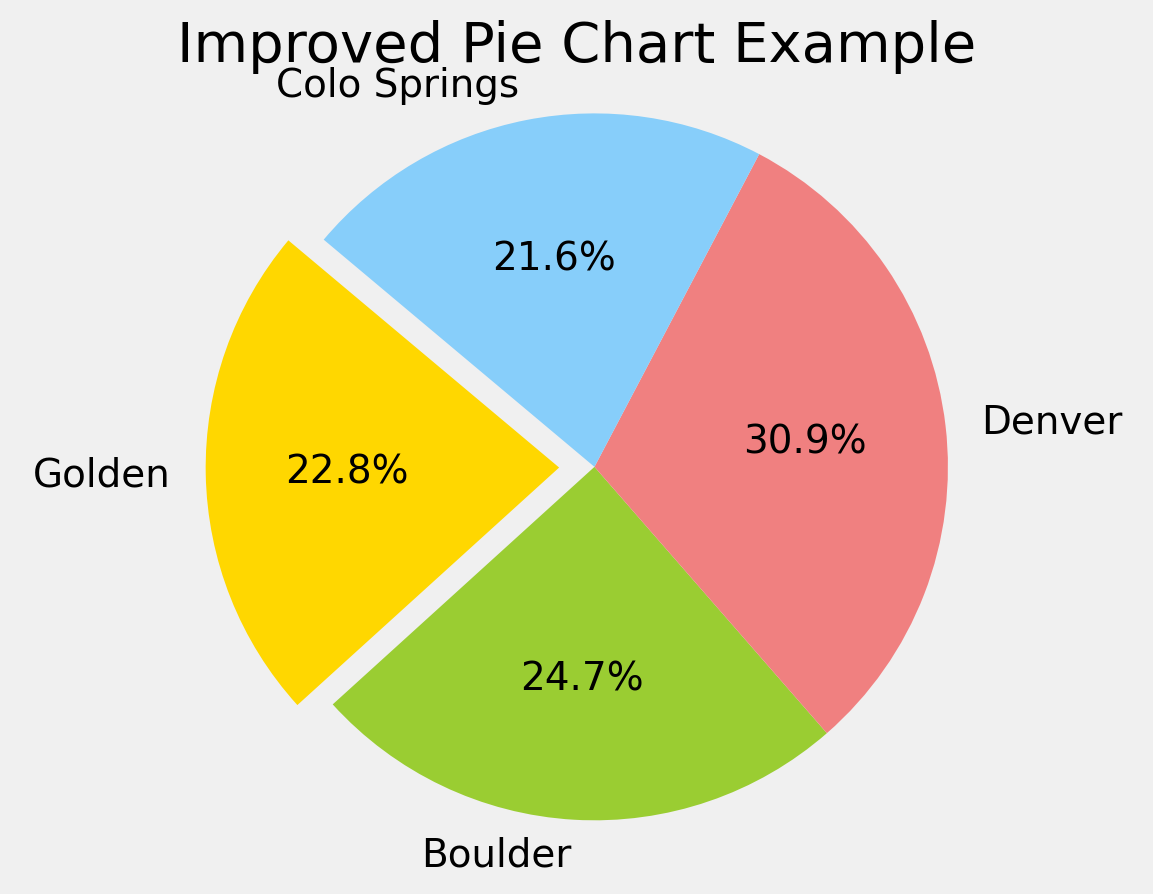

In [11]:
# Plot a better chart using this data
# Colors
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Explode 1st slice (i.e., 'Golden')
explode = (0.1, 0, 0, 0)

# Plot
fig, ax = plt.subplots()
ax.pie(badPieValues, explode=explode, labels=badPieNames, colors=colors, autopct='%1.1f%%',  startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Title
plt.title('Improved Pie Chart Example')

plt.show()

Tell a story or describe a pattern using your new visualization.

**Your Answer Here:**

These % points display the individual amounts of waste water each city contributes to the Denver wastewater treatment plant

### Problem 3: Bad bar chart 1 (20 points)

Explain why this visualization is a bad one:

![Bad Bar Chart](http://imgur.com/AkLyM9I.png)

**Your Answer Here:**

The columns are the same color, there are not grid lines to allow the reader to more easily find the exact # value of the column, and the plot doesnt have a name. The columns also do not have their exact values displayed on top.

In [12]:
badBarNames = ["A", "B", "C"]
badBarValues = [240, 232, 251]

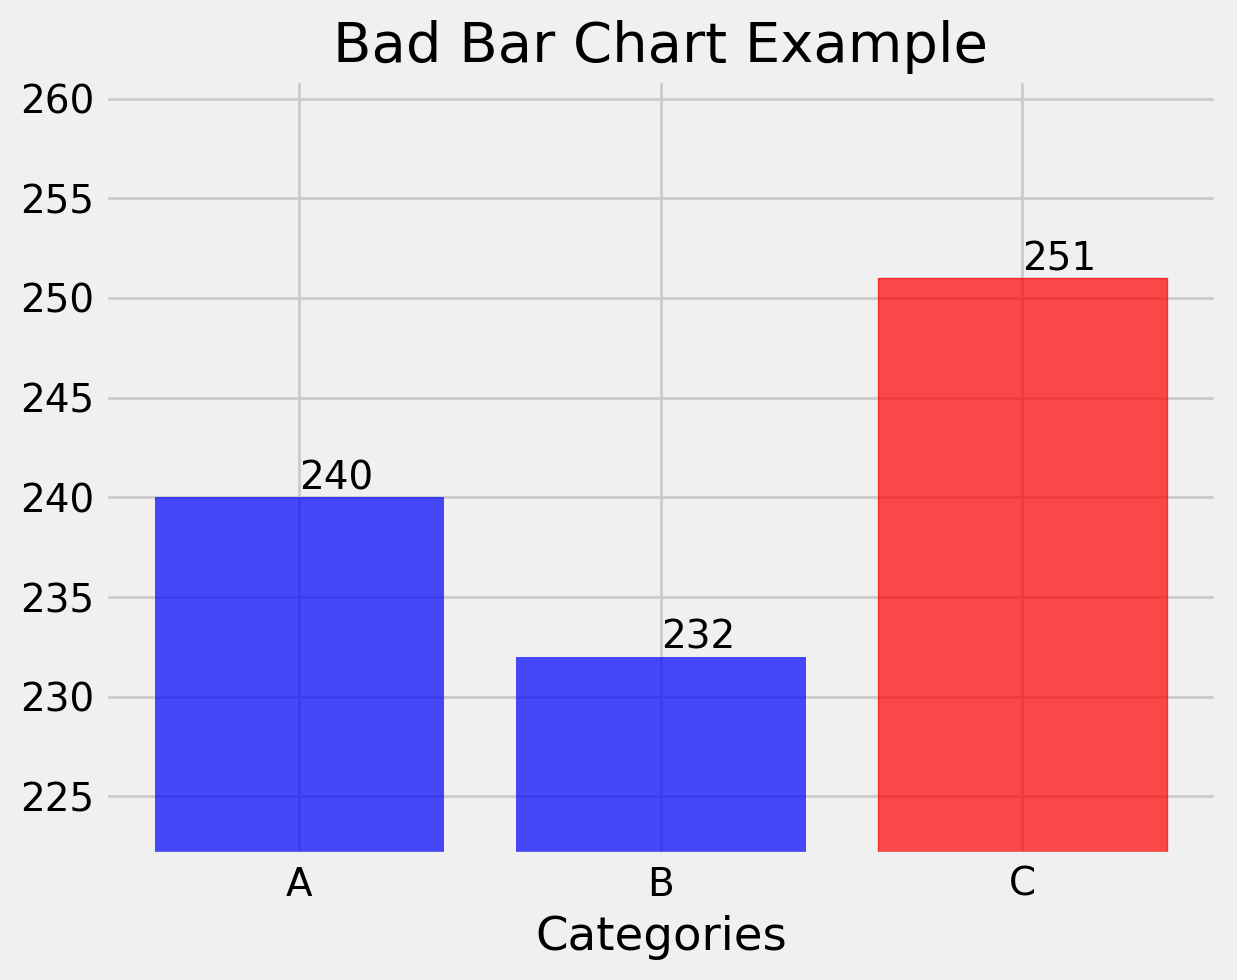

In [13]:
# Plot a better chart using this data
# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(badBarNames))

# Create the bar chart
fig, ax = plt.subplots()
bars = ax.bar(x_pos, badBarValues, align='center', alpha=0.7, color='blue')

# Highlight the bar that has the maximum value
bars[np.argmax(badBarValues)].set_color('r')

# Label the bars with their respective values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')

# Add some text for labels, title, and axes ticks
ax.set_xlabel('Categories')
ax.set_title('Imrpved Bar Chart Example')
ax.set_xticks(x_pos)
ax.set_xticklabels(badBarNames)

# Set y-axis limits to better encompass the data
y_min = min(badBarValues) - 10  # 10 units below the smallest data point
y_max = max(badBarValues) + 10  # 10 units above the largest data point
ax.set_ylim(y_min, y_max)

plt.show()


Tell a story or describe a pattern using your new visualization.

**Your Answer Here:**

Products A, B and C are being sold by an online retailer. Their respective values represent the total sales in thousands for each product over the course of 1 year.

### Problem 4: Bad bar chart 2 (20 points)

Explain why this visualization is a bad one:

![Bad Bar Chart](http://imgur.com/Ns3lgyp.png)

**Your Answer Here:**

The scale makes the top values hard to see, the plot doesnt have grid lines, each col doesnt have its own number/value on top.

In [16]:
badBar2Names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
badBar2Values = [240, 320, 360, 280, 290, 300, 500, 410, 390, 200, 220, 240]

(170.0, 530.0)

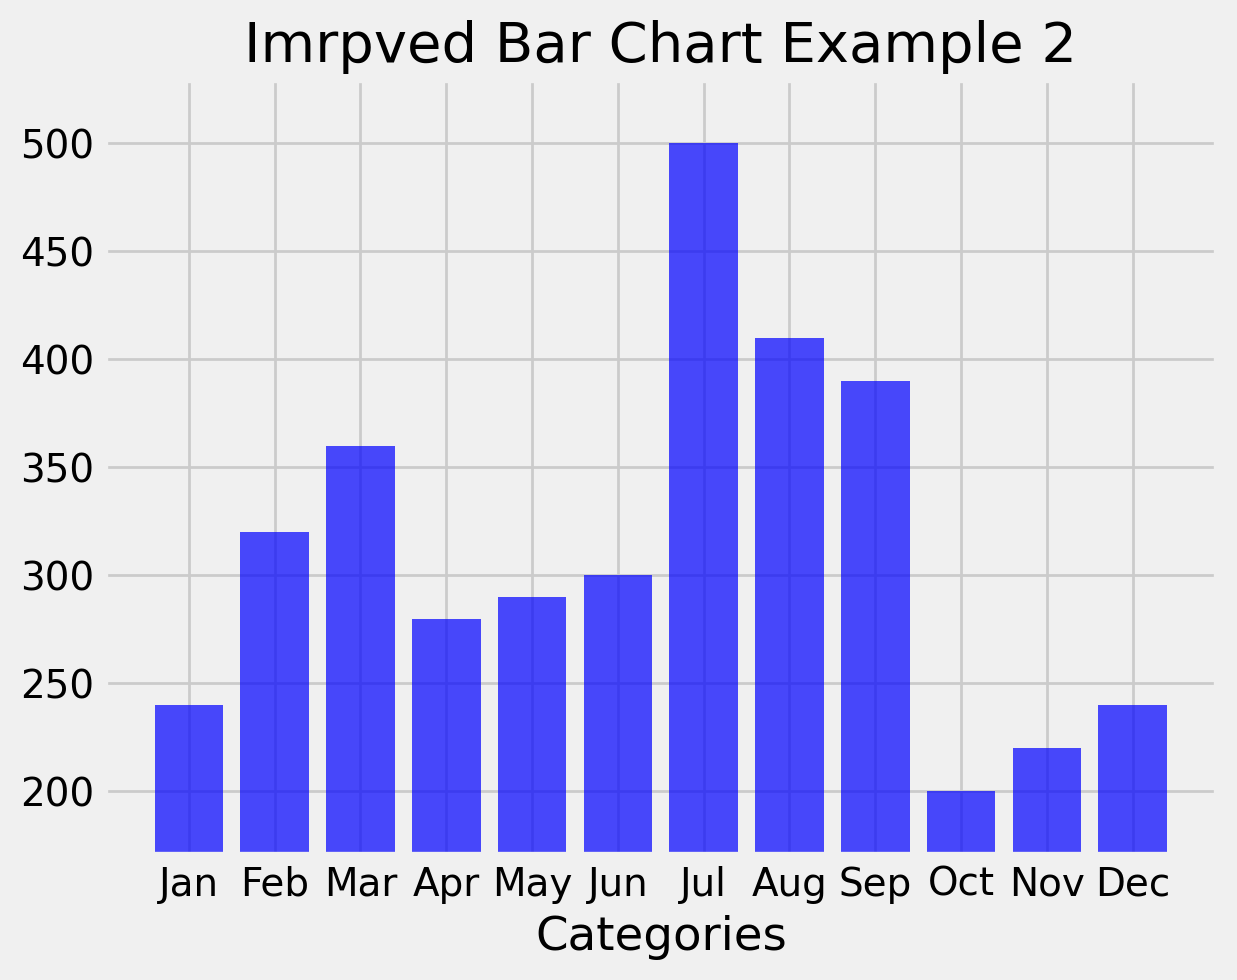

In [21]:
# Plot a better chart using this data
# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(badBar2Names))

# Create the bar chart
fig, ax = plt.subplots()
bars = ax.bar(x_pos, badBar2Values, align='center', alpha=0.7, color='blue')

# # Label the bars with their respective values
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')

# Add some text for labels, title, and axes ticks
ax.set_xlabel('Categories')
ax.set_title('Imrpved Bar Chart Example 2')
ax.set_xticks(x_pos)
ax.set_xticklabels(badBar2Names)

# Set y-axis limits to better encompass the data
y_min = min(badBar2Values) - 30  # 10 units below the smallest data point
y_max = max(badBar2Values) + 30  # 10 units above the largest data point
ax.set_ylim(y_min, y_max)


Tell a story or describe a pattern using your new visualization.

**Your Answer Here:**

Each bar represents a single month's total rainfall in mm.

### Questionnaire
1) How long did you spend on this assignment?<br><br>
    About 2-3 hours.
<br><br>
2) What did you like about it? What did you not like about it?<br><br>
    I think the formatting was strange, but I did enjoy learning more about visualization as a whole.
<br><br>
3) Did you find any errors or is there anything you would like changed?<br><br>
    No
<br><br>